In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import gmaps.geojson_geometries
from config import (gkey)

In [2]:
# Filepath for data file
facility_csv = "PA_facility_pollution.csv"

# Read the csv file
facility_data = pd.read_csv(facility_csv)

# Display the data table for preview
facility_data.head()

,Unique ID,FacilityName,Rank_TRI_14,Rank_GHG_14,Latitude,Longitude,LocationAddress,City,State,ZIP,...,Sixth_GHG_ID,TRI_ID,Second_TRI_ID,Third_TRI_ID,Fourth_TRI_ID,Fifth_TRI_ID,FRS_ID,Second_FRS_ID,Third_FRS_ID,Fourth_FRS_ID
0,1.10E+11,3M ASTON,11432.0,NaN,39.850112,-75.412138,50 MILTON DR,CHESTER TOWNSHIP,PA,19013,...,NaN,19014CSTMC50MIL,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
1,1.10E+11,A P GREEN REFRACTORIES INC SPROUL PA PLANT,6709.0,NaN,40.270910,-78.464737,2926 QUARRY RD,CLAYSBURG,PA,16625,...,NaN,16682GNRLRPOBOX,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
2,1.10E+11,ABERDEEN ROAD CO,NaN,NaN,40.015787,-76.726143,105 E SINKING SPRING LN,EMIGSVILLE,PA,173180435,...,NaN,17310HRCLTABERD,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
3,1.10E+11,LAKE REGION MEDICAL,1226.0,NaN,40.195060,-75.486960,200 W 7TH AVE,TRAPPE,PA,194260992,...,NaN,19426NFRMT200WE,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN
4,1.10E+11,ACCURIDE ERIE,14007.0,NaN,42.131720,-80.058270,1015 E 12TH ST,ERIE,PA,16503,...,NaN,16503KWLP 1015E,NaN,NaN,NaN,NaN,1.100000e+11,NaN,NaN,NaN


In [3]:
# Drop unnecessary columns
drop_df = facility_data.drop(facility_data.columns[[0, 2, 3, 11, 12, 13, 14,
                                                   18, 19, 20, 21, 22, 28, 29, 30,
                                                   31, 32, 33, 34, 35, 36, 37, 38,
                                                   39, 40, 41, 42]], axis=1)
# drop_df.head()

In [4]:
# Rename GHG Emissions columns
GHG_df = drop_df.rename(columns={"GHG_Direct_Emissions_14_in_metric_tons": "GHG_14",
                                   "GHG_Direct_Emissions_13_in_metric_tons": "GHG_13",
                                   "GHG_Direct_Emissions_12_in_metric_tons": "GHG_12",
                                   "GHG_Direct_Emissions_11_in_metric_tons": "GHG_11",
                                   "GHG_Direct_Emissions_10_in_metric_tons": "GHG_10"})
# GHG_df.head()

In [5]:
# Create new df to count # of "Not Reported" by year

# Replace "Not reported" in GHG years with 1.01
not_reported_df = GHG_df.replace(to_replace="Not reported", value=1.01)

# Count how many 1.01 = number of facilities that did not report by year
count_14 = ((not_reported_df["GHG_14"]==1.01).value_counts())
count_13 = ((not_reported_df["GHG_13"]==1.01).value_counts())
count_12 = ((not_reported_df["GHG_12"]==1.01).value_counts())
count_11 = ((not_reported_df["GHG_11"]==1.01).value_counts())
count_10 = ((not_reported_df["GHG_10"]==1.01).value_counts())

print(count_14)
print(count_13)
print(count_12)
print(count_11)
print(count_10)

True     1037
False     330
Name: GHG_14, dtype: int64
True     1055
False     312
Name: GHG_13, dtype: int64
True     1074
False     293
Name: GHG_12, dtype: int64
True     1090
False     277
Name: GHG_11, dtype: int64
True     1122
False     245
Name: GHG_10, dtype: int64


In [19]:
# Create DataFrame to display # of facilities that did not report
facility_report = [[2014, 1037, 330],
                   [2013, 1055, 312],
                   [2012, 1074, 293],
                   [2011, 1090, 277],
                   [2010, 1122, 245]]

GHG_reported_df = pd.DataFrame(facility_report, columns = ['Year', '# Facilities Not Reported', '# Facilities Reported'])

# Display DataFrame
GHG_reported_df       

,Year,# Facilities Not Reported,# Facilities Reported
0,2014,1037,330
1,2013,1055,312
2,2012,1074,293
3,2011,1090,277
4,2010,1122,245


In [7]:
# Turn "Not reported" GHG Emissions into floats in order to chart/sum

# Replace "Not reported" in GHG years with 1.01
total_GHG_df = GHG_df.replace(to_replace="Not reported", value=0)

# Turn GHG Emissions into floats
total_GHG_df["GHG_14"] = total_GHG_df["GHG_14"].astype(float)
total_GHG_df["GHG_13"] = total_GHG_df["GHG_13"].astype(float)
total_GHG_df["GHG_12"] = total_GHG_df["GHG_12"].astype(float)
total_GHG_df["GHG_11"] = total_GHG_df["GHG_11"].astype(float)
total_GHG_df["GHG_10"] = total_GHG_df["GHG_10"].astype(float)

# total_GHG_df


138463100.0
138548958.0
132013761.0
136593277.0
136820895.0


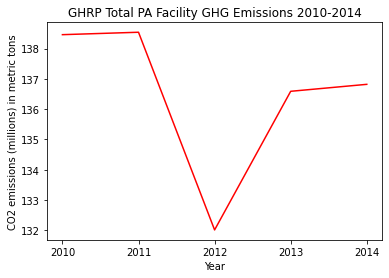

In [8]:
# Line trend plot showing Emissions over time

# Get the total sum of all years
print (total_GHG_df["GHG_10"].sum())
print (total_GHG_df["GHG_11"].sum())
print (total_GHG_df["GHG_12"].sum())
print (total_GHG_df["GHG_13"].sum())
print (total_GHG_df["GHG_14"].sum())

# Create list & dictionary for axis & plot points
years = np.arange(5)
total_emissions = [138.46, 138.54, 132.013, 136.59, 136.82]

# Label tick marks as years
tick_locations = [value for value in years]
plt.xticks(tick_locations, ["2010","2011", "2012", "2013", "2014"])

# Give our chart some labels and a tile
plt.title("GHRP Total PA Facility GHG Emissions 2010-2014")
plt.xlabel("Year")
plt.ylabel("CO2 emissions (millions) in metric tons")

# Show Plot
plt.plot(years, total_emissions, color="red")

In [9]:
#Sum GHG Emissions for each row

#Create list of columns to sum
total_list = ["GHG_14", "GHG_13", "GHG_12", "GHG_11", "GHG_10"]

#Hold total of sums of columns in new column "Total_GHG_Emissions"
total_GHG_df["Total_GHG_Emissions"] = total_GHG_df[total_list].sum(axis=1)

#Display DataFrame
total_GHG_df.head()

,FacilityName,Latitude,Longitude,LocationAddress,City,State,ZIP,County,IndustryType,Parent_Companies_2014_GHG,Parent_Companies_2014_TRI,GHG_14,GHG_13,GHG_12,GHG_11,GHG_10,Total_GHG_Emissions
0,3M ASTON,39.850112,-75.412138,50 MILTON DR,CHESTER TOWNSHIP,PA,19013,DELAWARE,NaN,NaN,3M CO,0.0,0.0,0.0,0.0,0.0,0.0
1,A P GREEN REFRACTORIES INC SPROUL PA PLANT,40.270910,-78.464737,2926 QUARRY RD,CLAYSBURG,PA,16625,BLAIR,NaN,NaN,A P GREEN INDUSTRIES INC.,0.0,0.0,0.0,0.0,0.0,0.0
2,ABERDEEN ROAD CO,40.015787,-76.726143,105 E SINKING SPRING LN,EMIGSVILLE,PA,173180435,YORK,NaN,NaN,ABERDEEN ROAD CO,0.0,0.0,0.0,0.0,0.0,0.0
3,LAKE REGION MEDICAL,40.195060,-75.486960,200 W 7TH AVE,TRAPPE,PA,194260992,MONTGOMERY,NaN,NaN,ACCELLENT INC.,0.0,0.0,0.0,0.0,0.0,0.0
4,ACCURIDE ERIE,42.131720,-80.058270,1015 E 12TH ST,ERIE,PA,16503,ERIE,NaN,NaN,ACCURIDE CORP,0.0,0.0,0.0,0.0,0.0,0.0


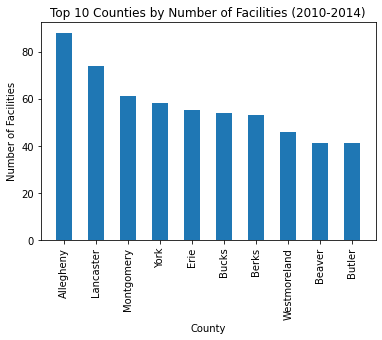

In [10]:
# Create bar plot showing Top 10 Counties by Total Number of Faciltiies

#Use groupby to group counties & create DataFrame
county_facilities_df = (total_GHG_df.groupby("County")["FacilityName"].count()).sort_values(ascending = False)
county_facilities = [['Allegheny', 88],
                     ['Lancaster', 74],
                     ['Montgomery', 61],
                     ['York', 58],
                     ['Erie', 55],
                     ['Bucks', 54],
                     ['Berks', 53],
                     ['Westmoreland', 46],
                     ['Beaver', 41],
                     ['Butler', 41]]

facility_county_count = pd.DataFrame(county_facilities, columns = ['County', 'Number of Facilities'])

# Create bar graph to display Top 10 Counties by Facilities Count
measurements = facility_county_count["Number of Facilities"]
x_axis = np.arange(len(county_facilities))
labels = facility_county_count["County"]

# Create a bar chart based upon the above data
plt.bar(x_axis, measurements, align="center", width = 0.5)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=labels, rotation = 90)

# Give the chart a title, x label, and y label
plt.xlabel("County")
plt.ylabel("Number of Facilities")
plt.title("Top 10 Counties by Number of Facilities (2010-2014)")

#Show plot
plt.show()

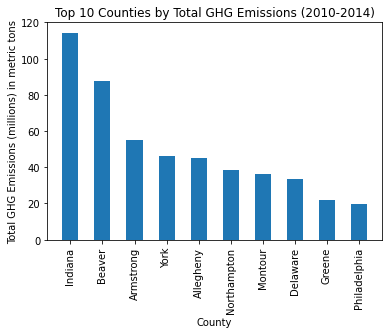

In [11]:
# Create bar plot showing highest count of facilities by Total Emissions
#Use groupby to group counties

#Use groupby to group counties & create DataFrame
county_emissions_df = (total_GHG_df.groupby("County")["Total_GHG_Emissions"].sum()).sort_values(ascending = False)

# Display Top 10 Counties by Total GHG Emissions
# county_emissions_df.head(10)

# Save Top 10 into List and create DataFrame
county_emissions = [['Indiana', 114.33],
                     ['Beaver',  87.37],
                     ['Armstrong', 54.98],
                     ['York', 46.32],
                     ['Allegheny', 44.96],
                     ['Northampton', 38.28],
                     ['Montour',  36.12],
                     ['Delaware',  33.32],
                     ['Greene',  22.18],
                     ['Philadelphia', 19.82]]

county_total_emissions_df = pd.DataFrame(county_emissions, columns = ['County', 'Total GHG Emissions'])

# Create bar graph to display Top 10 Counties by Facilities Count
measurements = county_total_emissions_df["Total GHG Emissions"]
x_axis = np.arange(len(county_emissions))
labels = county_total_emissions_df["County"]

# Create a bar chart based upon the above data
plt.bar(x_axis, measurements, align="center", width = 0.5)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels=labels, rotation =90)

# Give the chart a title, x label, and y label
plt.xlabel("County")
plt.ylabel("Total GHG Emissions (millions) in metric tons")
plt.title("Top 10 Counties by Total GHG Emissions (2010-2014)")

#Show plot
plt.show()


In [12]:
# Create map of total GHG emissions

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

#Only use rows that have float values
total_GHG_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

GHG_weight = total_GHG_df["Total_GHG_Emissions"]

# Store 'Lat' and 'Lng' into  locations 
locations = total_GHG_df[["Latitude", "Longitude"]].astype(float)

In [13]:
# Create a GHG Emissions Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=GHG_weight, 
                                 dissipating=False,max_intensity=1,
                                 point_radius = .04)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
# Add maps showing locations of all facilities

facilities_layer = gmaps.symbol_layer(
    locations, fill_color='green', stroke_color='green', scale=2
)
fig = gmaps.figure()
fig.add_layer(facilities_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
# Add maps showing only facilities that reported emissions
facilities_emissions = total_GHG_df[total_GHG_df["Total_GHG_Emissions"]!=0]
facilities_emissions_locations = facilities_emissions[["Latitude", "Longitude"]]

facilility_emissions_layer= gmaps.symbol_layer(
    facilities_emissions_locations, fill_color='red', stroke_color='red', scale=2
)
fig = gmaps.figure()
fig.add_layer(facilility_emissions_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
# # PA county boundaries
# gmaps.geojson_geometries.geometry_metadata('us-counties')
# countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

# fig = gmaps.figure()

# geojson_layer = gmaps.geojson_layer(countries_geojson)
# fig.add_layer(geojson_layer)
# fig